In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('Mall_Customers.csv')
df

,Customer Name,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,a,1,Male,19,15,39
1,b,2,Male,21,15,81
2,c,3,Female,20,16,6
3,d,4,Female,23,16,77
4,e,5,Female,31,17,40
...,...,...,...,...,...,...
195,a170,196,Female,35,120,79
196,a171,197,Female,45,126,28
197,a172,198,Male,32,126,74
198,a173,199,Male,32,137,18


AttributeError: 'AxesSubplot' object has no attribute 'plt'

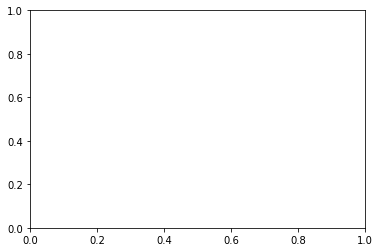

In [25]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots()
axes.plt(df.Date, df['Close Price'], 'k--', alpha=0, lw=2)

Text(0, 0.5, 'Spending Score (1-100)')

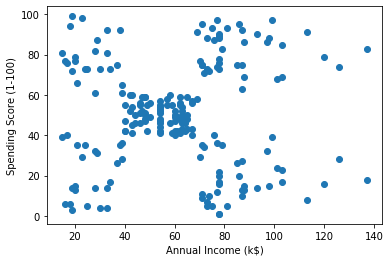

In [5]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

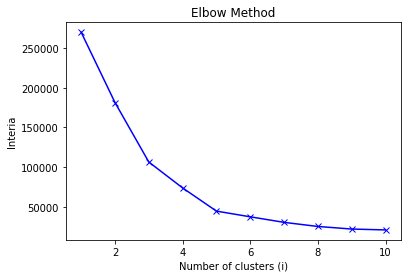

In [6]:
from sklearn.cluster import KMeans
X = df[['Annual Income (k$)','Spending Score (1-100)']]
interia = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    interia.append(km.inertia_)
plt.plot(range(1,11),interia,'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (i)')
plt.ylabel('Interia')
plt.show()

In [7]:
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.2968969162503008
For n_clusters=3, The Silhouette Coefficient is 0.46761358158775435
For n_clusters=4, The Silhouette Coefficient is 0.4931963109249047
For n_clusters=5, The Silhouette Coefficient is 0.553931997444648
For n_clusters=6, The Silhouette Coefficient is 0.53976103063432
For n_clusters=7, The Silhouette Coefficient is 0.5288104473798049
For n_clusters=8, The Silhouette Coefficient is 0.4572211842776841
For n_clusters=9, The Silhouette Coefficient is 0.4592339450478494
For n_clusters=10, The Silhouette Coefficient is 0.44796219430573503


In [8]:
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters=k).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()

k: 1  cost: 269981.28
k: 2  cost: 181363.59595959596
k: 3  cost: 106348.37306211118
k: 4  cost: 73679.78903948834
k: 5  cost: 44448.45544793371
k: 6  cost: 37271.8862365895
k: 7  cost: 30241.34361793659
k: 8  cost: 25018.576334776335
k: 9  cost: 21862.092672182887
k: 10  cost: 19755.6198608334



In [9]:
km=KMeans(n_clusters=4)
ymodel = km.fit_predict(X)

In [10]:
km.cluster_centers_

array([[48.26      , 56.48      ],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [87.        , 18.63157895]])

In [11]:
df['Cluster'] = ymodel
df.head()

,Customer Name,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,a,1,Male,19,15,39,2
1,b,2,Male,21,15,81,0
2,c,3,Female,20,16,6,2
3,d,4,Female,23,16,77,0
4,e,5,Female,31,17,40,2


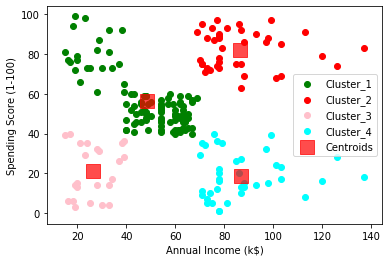

In [12]:
df_1 = df[df.Cluster == 0]
df_2 = df[df.Cluster == 1]
df_3 = df[df.Cluster == 2]
df_4 = df[df.Cluster == 3]
plt.scatter(df_1['Annual Income (k$)'], df_1['Spending Score (1-100)'], color = 'green', label='Cluster_1')
plt.scatter(df_2['Annual Income (k$)'], df_2['Spending Score (1-100)'], color = 'red', label='Cluster_2')
plt.scatter(df_3['Annual Income (k$)'], df_3['Spending Score (1-100)'], color = 'pink', label='Cluster_3')
plt.scatter(df_4['Annual Income (k$)'], df_4['Spending Score (1-100)'], color = 'cyan', label='Cluster_4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [13]:
km=KMeans(n_clusters=6)
ymodel = km.fit_predict(X)

In [14]:
km.cluster_centers_

array([[ 26.30434783,  20.91304348],
       [ 55.2962963 ,  49.51851852],
       [109.7       ,  82.        ],
       [ 88.2       ,  17.11428571],
       [ 78.55172414,  82.17241379],
       [ 25.72727273,  79.36363636]])

In [15]:
df['Cluster'] = ymodel
df.head()

,Customer Name,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,a,1,Male,19,15,39,0
1,b,2,Male,21,15,81,5
2,c,3,Female,20,16,6,0
3,d,4,Female,23,16,77,5
4,e,5,Female,31,17,40,0


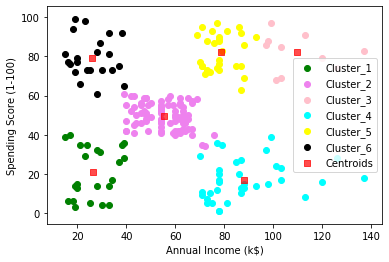

In [16]:
df_1 = df[df.Cluster == 0]
df_2 = df[df.Cluster == 1]
df_3 = df[df.Cluster == 2]
df_4 = df[df.Cluster == 3]
df_5 = df[df.Cluster == 4]
df_6 = df[df.Cluster == 5]
plt.scatter(df_1['Annual Income (k$)'], df_1['Spending Score (1-100)'], c = 'green', label='Cluster_1')
plt.scatter(df_2['Annual Income (k$)'], df_2['Spending Score (1-100)'], c = 'violet', label='Cluster_2')
plt.scatter(df_3['Annual Income (k$)'], df_3['Spending Score (1-100)'], c = 'pink', label='Cluster_3')
plt.scatter(df_4['Annual Income (k$)'], df_4['Spending Score (1-100)'], c = 'cyan', label='Cluster_4')
plt.scatter(df_5['Annual Income (k$)'], df_5['Spending Score (1-100)'], c = 'yellow', label='Cluster_5')
plt.scatter(df_6['Annual Income (k$)'], df_6['Spending Score (1-100)'], c = 'black', label='Cluster_6')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker='s', c='red', alpha=0.7, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [17]:
df.to_csv('Mall_Customer_2.csv')
df

,Customer Name,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,a,1,Male,19,15,39,0
1,b,2,Male,21,15,81,5
2,c,3,Female,20,16,6,0
3,d,4,Female,23,16,77,5
4,e,5,Female,31,17,40,0
...,...,...,...,...,...,...,...
195,a170,196,Female,35,120,79,2
196,a171,197,Female,45,126,28,3
197,a172,198,Male,32,126,74,2
198,a173,199,Male,32,137,18,3


In [18]:
import pickle

In [19]:
with open('model_pickle','wb') as f:
    pickle.dump(ymodel,f)

In [20]:
with open('model_pickle','rb') as f:
    df = pickle.load(f)